# Trabajo final de inferencia estadística
#### Antonio Cabrera Landín

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import statistics as st
import statsmodels.api as sm
import statsmodels
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

/home/antonio/Repos/students/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


En este notebook estudiaremos el dataset "Student Alcohol Consumption" el cual contiene información sobre la vida de los alumnos y su éxito académico.

El dataset proviene de un [estudio](https://hdl.handle.net/1822/8024) realizado en dos escuelas secundarias portuguesas (Cortez & Silva, 2008). Los datos fueron recolectados a través de encuestas anónimas a estudiantes y están disponibles públicamente en [Kaggle](https://kaggle.com/datasets/uciml/student-alcohol-consumption).

En el dataset incluye dos archivos: `student-mat.csv` el cual recoge los datos de los alumnos de la asignatura de matemáticas y `student-por.csv` que recoge los datos de los alumnos de la asignatura de portugués. Nosotros nos centraremos en los alumnos de matemáticas.

In [2]:
# Load a DataFrame with a specific version of a CSV
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/student-alcohol-consumption",
    "student-mat.csv",
)

Vemos que nuestro dataframe incluye los datos de 395 alumnos:

| Atributo       | Descripción (Dominio) |
|----------------|-----------------------|
| **sex**        | Sexo del estudiante (binario: femenino o masculino) |
| **age**        | Edad del estudiante (numérico: de 15 a 22 años) |
| **school**     | Escuela del estudiante (binario: Gabriel Pereira o Mousinho da Silveira) |
| **address**    | Tipo de dirección del hogar (binario: urbano o rural) |
| **Pstatus**    | Estado de convivencia de los padres (binario: viven juntos o separados) |
| **Medu**       | Nivel educativo de la madre (numérico: de 0 a 4) |
| **Mjob**       | Trabajo de la madre (nominal: teacher, health, services, at_home, other) |
| **Fedu**       | Nivel educativo del padre (numérico: de 0 a 4) |
| **Fjob**       | Trabajo del padre (nominal: teacher, health, services, at_home, other) |
| **guardian**   | Tutor del estudiante (nominal: madre, padre u otro) |
| **famsize**    | Tamaño de la familia (binario: ≤ 3 o > 3) |
| **famrel**     | Calidad de las relaciones familiares (numérico: de 1 - muy mala a 5 - excelente) |
| **reason**     | Razón para elegir la escuela (nominal: cercanía al hogar, reputación de la escuela, preferencia por el curso u otro) |
| **traveltime** | Tiempo de viaje de casa a la escuela (numérico: 1 - <15 min, 2 - 15-30 min, 3 - 30 min-1h, 4 - >1h) |
| **studytime**  | Tiempo de estudio semanal (numérico: 1 - <2h, 2 - 2-5h, 3 - 5-10h, 4 - >10h) |
| **failures**   | Número de reprobaciones previas (numérico: n si 1≤n<3, sino 4) |
| **schoolsup**  | Apoyo educativo adicional de la escuela (binario: sí o no) |
| **famsup**     | Apoyo educativo familiar (binario: sí o no) |
| **activities** | Actividades extracurriculares (binario: sí o no) |
| **paidclass**  | Clases pagadas adicionales (binario: sí o no) |
| **internet**   | Acceso a Internet en casa (binario: sí o no) |
| **nursery**    | Asistió a educación preescolar (binario: sí o no) |
| **higher**     | Aspira a educación superior (binario: sí o no) |
| **romantic**   | Tiene una relación romántica (binario: sí o no) |
| **freetime**   | Tiempo libre después de la escuela (numérico: de 1 - muy poco a 5 - mucho) |
| **goout**      | Salidas con amigos (numérico: de 1 - muy pocas a 5 - muy frecuentes) |
| **Walc**       | Consumo de alcohol en fines de semana (numérico: de 1 - muy bajo a 5 - muy alto) |
| **Dalc**       | Consumo de alcohol en días laborales (numérico: de 1 - muy bajo a 5 - muy alto) |
| **health**     | Estado de salud actual (numérico: de 1 - muy malo a 5 - excelente) |
| **absences**   | Número de ausencias escolares (numérico: de 0 a 93) |
| **G1**         | Nota del primer período (numérico: de 0 a 20) |
| **G2**         | Nota del segundo período (numérico: de 0 a 20) |
| **G3**         | Nota final (numérico: de 0 a 20) |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Así se verían las entradas en nuestro dataset:

In [4]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


### ¿Aumenta la pareja el número de faltas en clase?

En nuestro dataset tenemos información de las vidas amorosas de los alumnos. Vamos a estudiar si los alumnos que están en una relación amorosa faltan más a clase para poder estar con su pareja.

In [5]:
df.groupby('romantic').size()

romantic
no     263
yes    132
dtype: int64

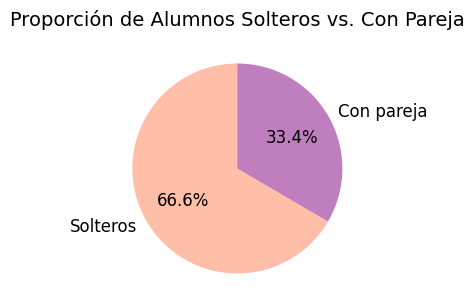

In [6]:
# 1. Contar alumnos con/sin pareja
romantic_counts = df['romantic'].value_counts()

# 2. Crear el pie plot
plt.figure(figsize=(4, 3))
colors = ['coral', 'purple']  # Colores personalizados
explode = (0.05, 0)  # Resaltar ligeramente una porción

plt.pie(
    romantic_counts,
    labels=['Solteros', 'Con pareja'],  # Etiquetas
    autopct='%1.1f%%',  # Porcentajes con 1 decimal
    startangle=90,  # Ángulo inicial
    colors=colors,
    wedgeprops={'alpha':0.5},
    textprops={'fontsize': 12}
)

# 3. Añadir título y ajustes
plt.title('Proporción de Alumnos Solteros vs. Con Pareja', fontsize=14, pad=20)
plt.axis('equal')  # Para que el círculo sea perfecto

# 4. Mostrar el gráfico
plt.show()

Vemos que la edad de nuestros alumnos está comprendida entre los 15 y 22 años. Posiblemente en estas edades el hecho de tener pareja tenga mucho impacto en la vida escolar de los alumnos.

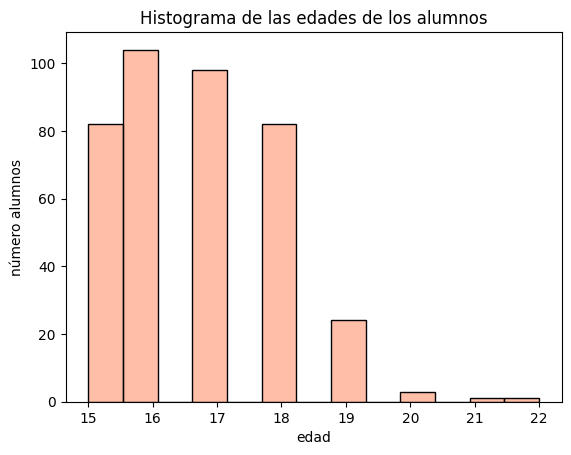

In [7]:
sns.histplot(df.age, color='coral', alpha=0.5)
plt.title("Histograma de las edades de los alumnos")
plt.xlabel("edad")
plt.ylabel("número alumnos")
plt.show()

In [8]:
absences_romantic = df.loc[df.romantic == 'yes', 'absences']
absences_no_romantic = df.loc[df.romantic == 'no', 'absences']

In [9]:
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu_romantic, sigma_romantic = stats.norm.fit(absences_romantic)
mu_no_romantic, sigma_no_romantic = stats.norm.fit(absences_no_romantic)

print(f"Media de faltas de los alumnos con una relación amorosa: {mu_romantic:.2f}")
print(f"Media de faltas de los alumnos solteros: {mu_no_romantic:.2f}")

Media de faltas de los alumnos con una relación amorosa: 7.44
Media de faltas de los alumnos solteros: 4.84


Para poder realizar un contraste de diferencia de medias (t-test), tenemos que saber si los datos fueron extraidos de una población normal.

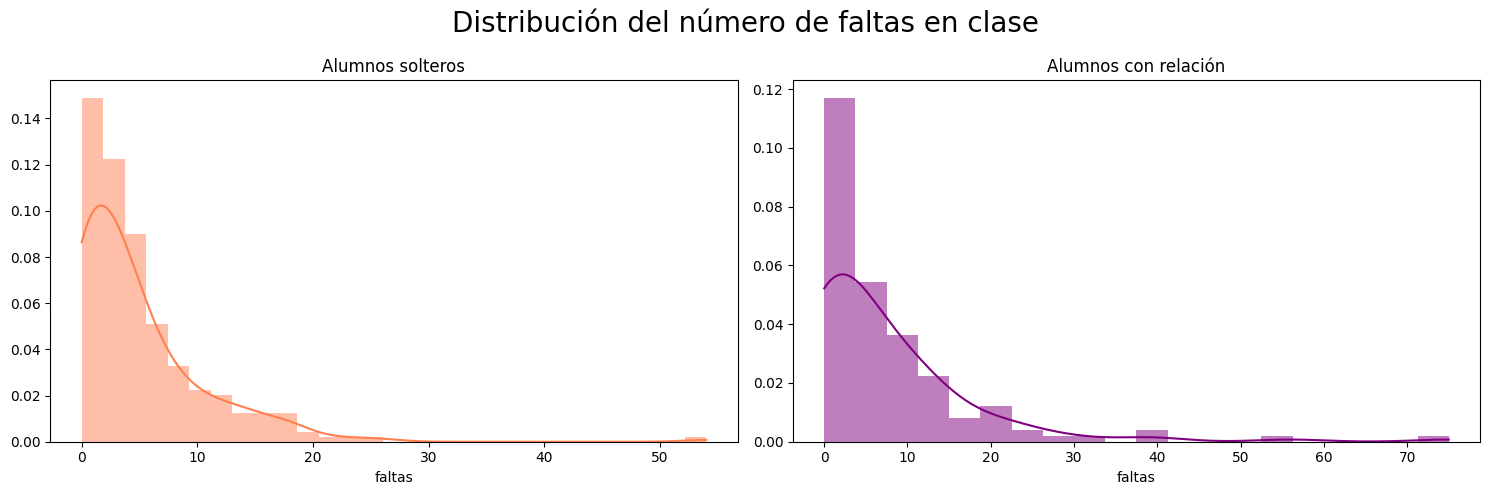

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=df[df.romantic == 'no'], x="absences", 
             color='coral', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax1)
ax1.set_title('Alumnos solteros')
ax1.set_ylabel('')
ax1.set_xlabel('faltas')

sns.histplot(data=df[df.romantic == 'yes'], x="absences",
             color='purple', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax2)
ax2.set_title('Alumnos con relación')
ax2.set_ylabel('')
ax2.set_xlabel('faltas')

plt.suptitle('Distribución del número de faltas en clase', fontsize=20)
plt.tight_layout()
plt.show()

En nuestro caso, viendo los gráficos de ditribución de las muestras parece que el t-test no va a ser bueno ya que los datos presentan mucha asimetría positiva.

In [11]:
# Calcular asimetría para cada grupo
skew_romantic = stats.skew(absences_romantic)
skew_no_romantic = stats.skew(absences_no_romantic)

print(f"Asimetría (románticos): {skew_romantic:.4f}")
print(f"Asimetría (solteros): {skew_no_romantic:.4f}")

Asimetría (románticos): 3.1351
Asimetría (solteros): 3.0083


Vamos a realizar un contraste para comprobar si efectivamente, las distribuciones del número de faltas en clase no son normales. En nuestro caso, no podremos utilizar un contraste de Shapiro-Wilk ya que tenemos muchos valores repetidos en las muestras.

In [12]:
num_duplicates = df['absences'].duplicated(keep='first').sum()
print(f"Número de valores duplicados en la muestra: {num_duplicates}")

Número de valores duplicados en la muestra: 361


Por lo tanto, usaremos el test ómnibus d´Agostino, ya que ambas muestras cumplen con la condición de tener más de 20 elementos ($n>20$).

In [13]:
k2_stat, p_value = sm.stats.omni_normtest(absences_romantic)

print("--- Alumnos en relación romántica ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}\n")

k2_stat, p_value = sm.stats.omni_normtest(absences_no_romantic)

print("--- Alumnos solteros ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

--- Alumnos en relación romántica ---
Estadístico K²: 116.4595
p-valor: 0.0000

--- Alumnos solteros ---
Estadístico K²: 207.1440
p-valor: 0.0000


Vemos que en ambos contrastes nos salen un p-valor muy cercano al cero, lo que significa que nuestros datos muestran muchas evidencias como para rechazar la hipótesis de que el número de faltas de los alumnos se distribuyen de forma normal.

Si comprobamos los QQ-plots, vemos que los cuantiles observados difieren de los cuantiles teóricos de la distribución normal, lo que nos indica que efectivamente los no siguen una distribución normal.

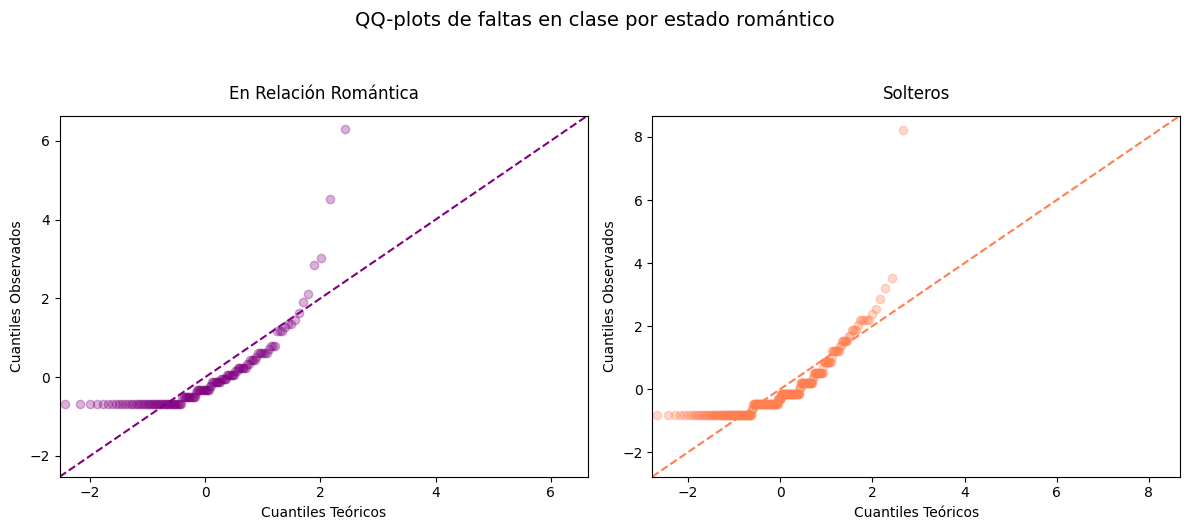

In [14]:
# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('QQ-plots de faltas en clase por estado romántico', fontsize=14, y=1.05)

pp1 = sm.ProbPlot(np.array(absences_romantic), fit=True)

# QQ-plot para alumnos en relación (absences_romantic)
qq1 = pp1.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='purple',
          markeredgecolor='purple', # borde de los puntos
          ax=ax1)

sm.qqline(qq1.axes[0], line='45', color='purple', linestyle='--')

ax1.set_title('En Relación Romántica', pad=12)
ax1.set_xlabel('Cuantiles Teóricos')
ax1.set_ylabel('Cuantiles Observados')

pp2 = sm.ProbPlot(np.array(absences_no_romantic), fit=True)

# QQ-plot para alumnos solteros (absences_no_romantic)
qq2 = pp2.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='coral',
          markeredgecolor='coral', # borde de los puntos,
          ax=ax2)

sm.qqline(qq2.axes[1], line='45', color='coral', linestyle='--')

ax2.set_title('Solteros', pad=12)
ax2.set_xlabel('Cuantiles Teóricos')
ax2.set_ylabel('Cuantiles Observados')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

Por lo tanto, como los datos no parecen provenir de una distribución normal utilizaremos un contraste no paramétrico. Como estamos trabajando con muestras independientes utilizaremos el contraste U de Mann-Whitney.

Nuestras hipótesis serán las siguientes:

$H_0: \mu_r = \mu_s$ el número de asusencias en clase es similar en solteros y no solteros \
$H_a: \mu_r > \mu_s$ el número de ausencias en clase es mayor para los alumnos que tienen una relación romántica

In [15]:
# Aplicar el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(
    absences_romantic, 
    absences_no_romantic,
    alternative='greater'
)

print(f"Estadístico U: {statistic:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value > alpha:
    print("\nAceptamos H_0 (p > 0.05)")
else:
    print("\nRechazamos H_0 (p ≤ 0.05)")

Estadístico U: 18787.50
Valor p: 0.0874

Aceptamos H_0 (p > 0.05)


Valores grandes del estadístico U sugieren diferencias pequeñas entre las poblaciones. Viendo que el p-valor supera nuestro nivel de significación $\alpha = 0.05$ concluimos que los datos no muestran evidencias suficientes como para rechazar la hipótesis nula de homogeneidad poblacional, por lo que los alumnos con relaciones amorosas parecen tener el mismo número de faltas que los alumnos solteros.

Este resultado es sorprendente ya que a priori si que parecía existir una diferencia significativa de ausencias en clase entre los alumnos solteros (4.84) y los alumnos con pareja (7.44)

### ¿Mejoran las notas a lo largo del curso?

Vamos a comprobar si la nota de los alumnos mejora a lo largo del curso.

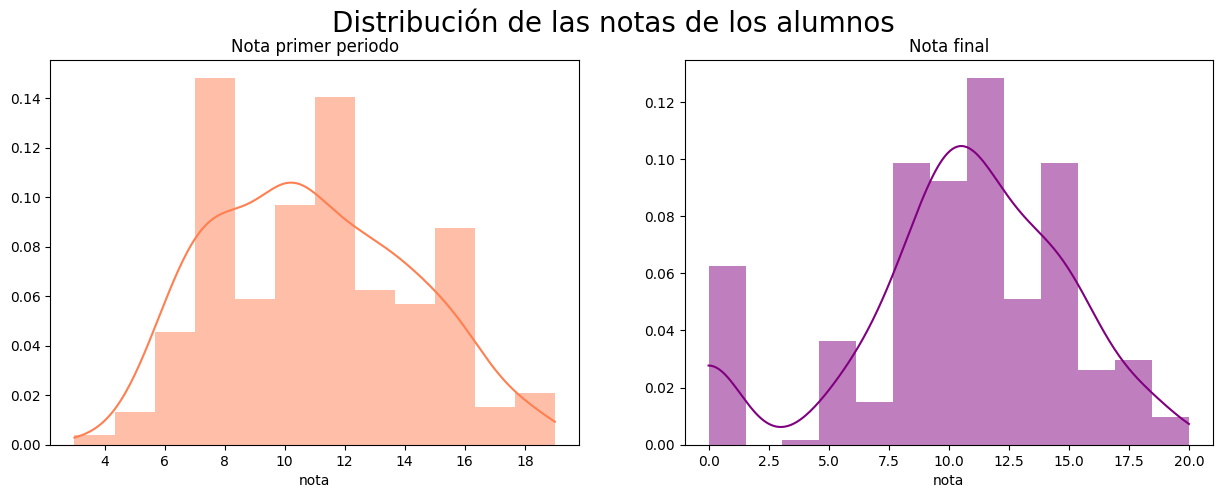

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=df, x="G1", 
             color='coral', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax1)
ax1.set_title('Nota primer periodo')
ax1.set_ylabel('')
ax1.set_xlabel('nota')

sns.histplot(data=df, x="G3",
             color='purple', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax2)
ax2.set_title('Nota final')
ax2.set_ylabel('')
ax2.set_xlabel('nota')

plt.suptitle('Distribución de las notas de los alumnos', fontsize=20)
plt.show()

Al igual que pasaba con las ausencias, no podemos utilizar el contraste de Shapiro Wilk ya que tenemos valores repetidos en las muestras. Esto ocurre debido a que las calificaciones están truncadas (no tienen valores decimales).

Por lo tanto, volveremos a usar el test ómnibus d´Agostino ya que nuestra muestra es mayor de 20 ($n>20$)

In [17]:
k2_stat, p_value = sm.stats.omni_normtest(df.G1)

print("--- Nota del primer periodo ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}\n")

k2_stat, p_value = sm.stats.omni_normtest(df.G3)

print("--- Nota final ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

--- Nota del primer periodo ---
Estadístico K²: 22.6120
p-valor: 0.0000

--- Nota final ---
Estadístico K²: 32.0592
p-valor: 0.0000


Aunque el contraste nos índique que los datos no muestran evidencias de proceder de una población normal, al estar trabajando con una muestra grande nos bastará con que las muestras sean simétricas.

En nuestro caso, no tienen tanta asimetría, así que proseguiremos con el t-test.

In [18]:
print(f"Asimetría notas primer periodo: {stats.skew(df.G1):.2f}\nAsimetría nota final: {stats.skew(df.G3):.2f}")

Asimetría notas primer periodo: 0.24
Asimetría nota final: -0.73


Realizamos el t-test de muestras pareadas.

In [19]:
t_stat, p_value = stats.ttest_rel(df['G1'], df['G3'], alternative='greater')
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: 3.5517
Valor p: 0.0002


El p-valor nos indica que los datos muestran evidencias suficientes como para rechazar que las notas de los alumnos se mantienen igual a lo largo del año. Por lo tanto, aceptaremos la hipótesis alternativa de que las notas finales son mayores que las notas del primer periodo.

### ¿Ayudan las clases particulares a aprobar?

Comprobaremos si la proporción de aprobados aumenta en los alumnos que asisten a clases particulares.

In [20]:
G3_paid = df.loc[df.paid == 'yes', 'G3']
G3_no_paid = df.loc[df.paid == 'no', 'G3']

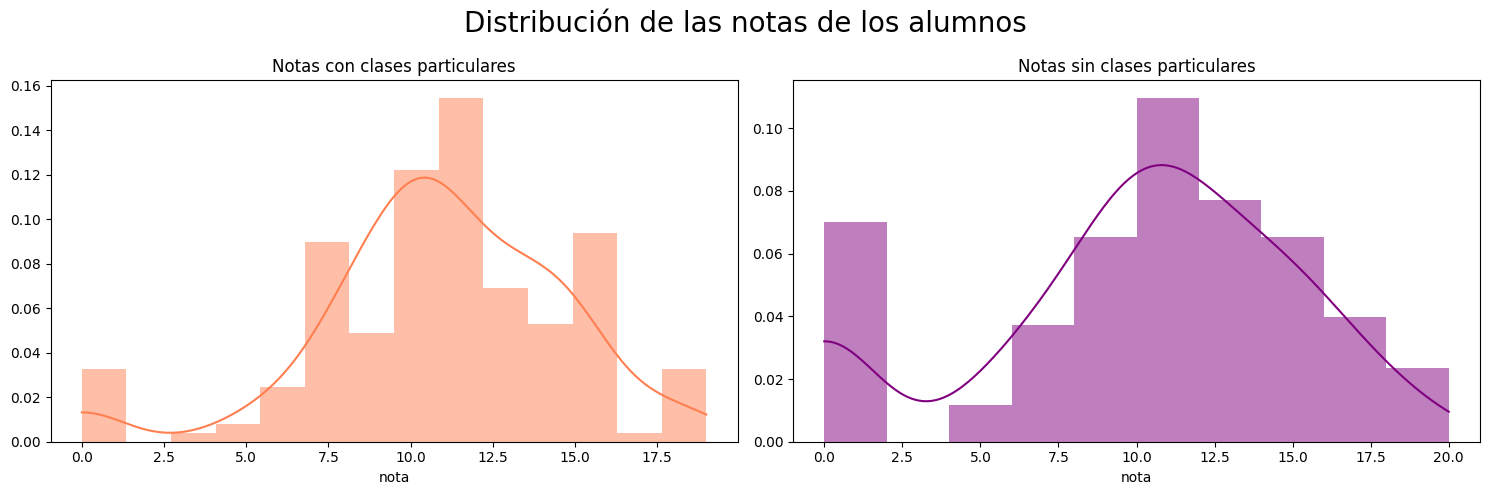

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=df[df.paid == 'yes'], x="G3", 
             color='coral', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax1)
ax1.set_title('Notas con clases particulares')
ax1.set_ylabel('')
ax1.set_xlabel('nota')

sns.histplot(data=df[df.paid == 'no'], x="G3",
             color='purple', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax2)
ax2.set_title('Notas sin clases particulares')
ax2.set_ylabel('')
ax2.set_xlabel('nota')

plt.suptitle('Distribución de las notas de los alumnos', fontsize=20)
plt.tight_layout()
plt.show()

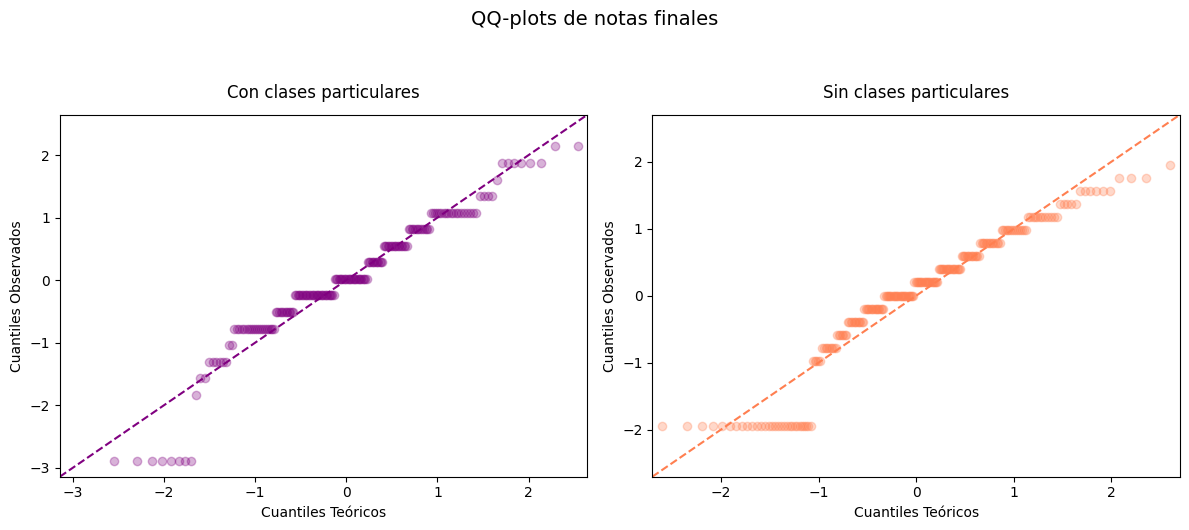

In [22]:
# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('QQ-plots de notas finales', fontsize=14, y=1.05)

pp1 = sm.ProbPlot(np.array(G3_paid), fit=True)

qq1 = pp1.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='purple',
          markeredgecolor='purple', # borde de los puntos
          ax=ax1)

sm.qqline(qq1.axes[0], line='45', color='purple', linestyle='--')

ax1.set_title('Con clases particulares', pad=12)
ax1.set_xlabel('Cuantiles Teóricos')
ax1.set_ylabel('Cuantiles Observados')

pp2 = sm.ProbPlot(np.array(G3_no_paid), fit=True)

qq2 = pp2.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='coral',
          markeredgecolor='coral', # borde de los puntos,
          ax=ax2)

sm.qqline(qq2.axes[1], line='45', color='coral', linestyle='--')

ax2.set_title('Sin clases particulares', pad=12)
ax2.set_xlabel('Cuantiles Teóricos')
ax2.set_ylabel('Cuantiles Observados')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

Los QQ-plots se ajusta bien excepto al principio, ya que hay muchos ceros de los alumnos que no van a clase. Como estamos trabajando con muestras grandes y la asimetría es moderada, usaremos un contraste paramétrico.

In [23]:
print(f"Asimetría notas con clases particulares: {stats.skew(G3_paid):.2f}\nAsimetría notas sin clases particulares: {stats.skew(G3_no_paid):.2f}")

Asimetría notas con clases particulares: -0.70
Asimetría notas sin clases particulares: -0.61


In [24]:
n1 = len(G3_paid)
n2 = len(G3_no_paid)

print(n1,n2)

181 214


In [25]:
nobs1 = len(df.loc[(df.paid == 'yes') & (df.G3 >= 10), 'G3'])
nobs2 = len(df.loc[(df.paid == 'no') & (df.G3 >= 10), 'G3'])

prop1 = nobs1 / n1
prop2 =  nobs2 / n2

In [26]:
print(f"Aprobados con clases particulares: {prop1*100:.2f}%\nAprobados sin clases particulares: {prop2*100:.2f}%")

Aprobados con clases particulares: 71.82%
Aprobados sin clases particulares: 63.08%


In [27]:
# Realizar el contraste de hipótesis
count = [nobs1, nobs2]
nobs = [n1, n2]

z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')

print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico z: 1.8417
Valor p: 0.0328


Si utilizamos un nivel de significaciónd del 5%, con el p-valor obtenido, rechazamos la hipótesis nula de que las proporciones de aprobados de los alumnos que toman clases particulares y de los que no, no difieren de forma significativa. Por lo tanto, aceptaremos al 5% la hipóteis alternativa de que la proporción de aprobados es mayor en los alumnos que toman clases particulares.

### ¿Aumenta el acceso a internet la variabilidad de la nota?

In [28]:
G3_internet = df.loc[df.internet == 'yes', 'G3']
G3_no_internet = df.loc[df.internet == 'no', 'G3']

In [29]:
print(f"Varianza nota con internet: {np.var(G3_internet):.2f}\nVarianza nota sin internet: {np.var(G3_no_internet):.2f}")

Varianza nota con internet: 20.92
Varianza nota sin internet: 19.82


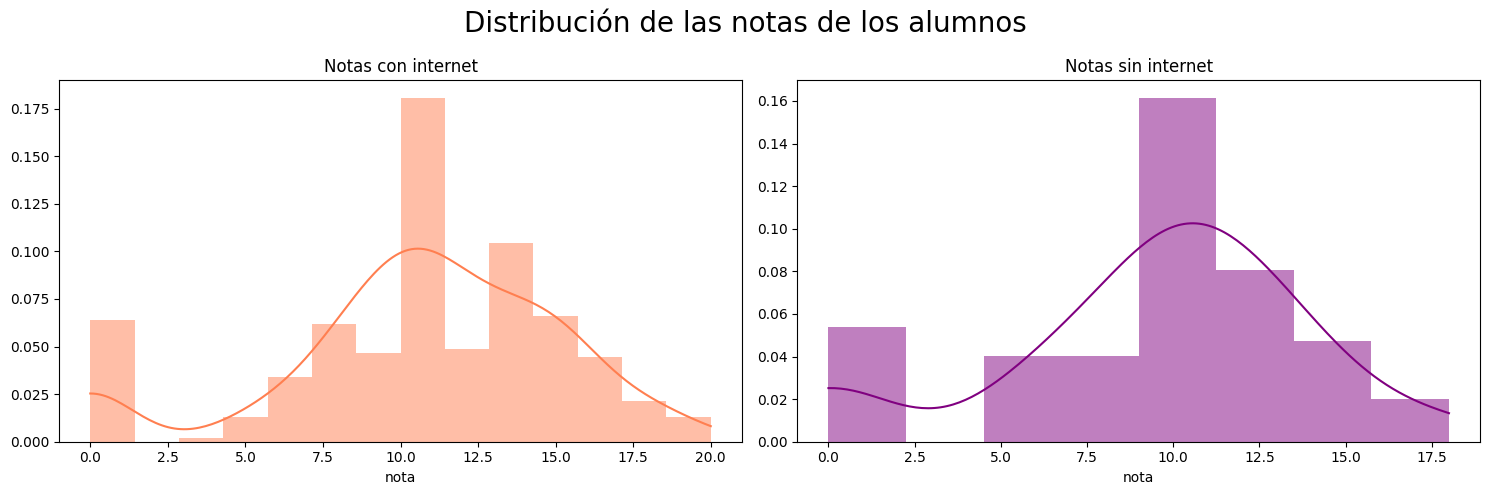

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=df[df.internet == 'yes'], x="G3", 
             color='coral', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax1)
ax1.set_title('Notas con internet')
ax1.set_ylabel('')
ax1.set_xlabel('nota')

sns.histplot(data=df[df.internet == 'no'], x="G3",
             color='purple', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax2)
ax2.set_title('Notas sin internet')
ax2.set_ylabel('')
ax2.set_xlabel('nota')

plt.suptitle('Distribución de las notas de los alumnos', fontsize=20)
plt.tight_layout()
plt.show()

In [31]:
print(len(G3_internet),len(G3_no_internet))

329 66


In [32]:
k2_stat, p_value = sm.stats.omni_normtest(G3_internet)

print("--- Nota con internet ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}\n")

k2_stat, p_value = sm.stats.omni_normtest(G3_no_internet)

print("--- Nota sin internet ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

--- Nota con internet ---
Estadístico K²: 28.7665
p-valor: 0.0000

--- Nota sin internet ---
Estadístico K²: 6.1500
p-valor: 0.0462


In [33]:
print(f"Asimetría notas con internet: {stats.skew(G3_internet):.2f}\nAsimetría notas sin internet: {stats.skew(G3_no_internet):.2f}")

Asimetría notas con internet: -0.75
Asimetría notas sin internet: -0.71


Aunque estemos trabajando con muestras grandes y con asimetría moderada, el contraste F de diferencias de varianzas es especialmente sensible a la no-normalidad. Por lo tanto, utilizaremos un contraste no paramétrico como el de Levene.

In [34]:
# Contraste de Levene
W_stat, p_value = stats.levene(G3_internet, G3_no_internet)

print(f"Estadístico W: {W_stat:.2f}")
print(f"P-valor: {p_value:.2f}")

Estadístico W: 0.17
P-valor: 0.68


Por lo tanto, los datos no muestran evidencias suficientes como para rechazar la hipótesis nula de igualdad de varianzas. Diremos que los datos muestran evidencias de que internet no aumenta la variabilidad de la nota.

### ¿Afecta consumir alcohol los findes de semana a la nota?

In [35]:
G3_walc = df.loc[df.Walc >= 2, 'G3']
G3_no_walc = df.loc[df.Walc < 2, 'G3']

In [36]:
np.mean(df.loc[df.Walc >= 2, 'age'])

np.float64(16.848360655737704)

In [37]:
print(np.mean(G3_walc), np.mean(G3_no_walc))

10.217213114754099 10.735099337748345


In [38]:
n1 = len(G3_walc)
n2 = len(G3_no_walc)
print(n1,n2)

244 151


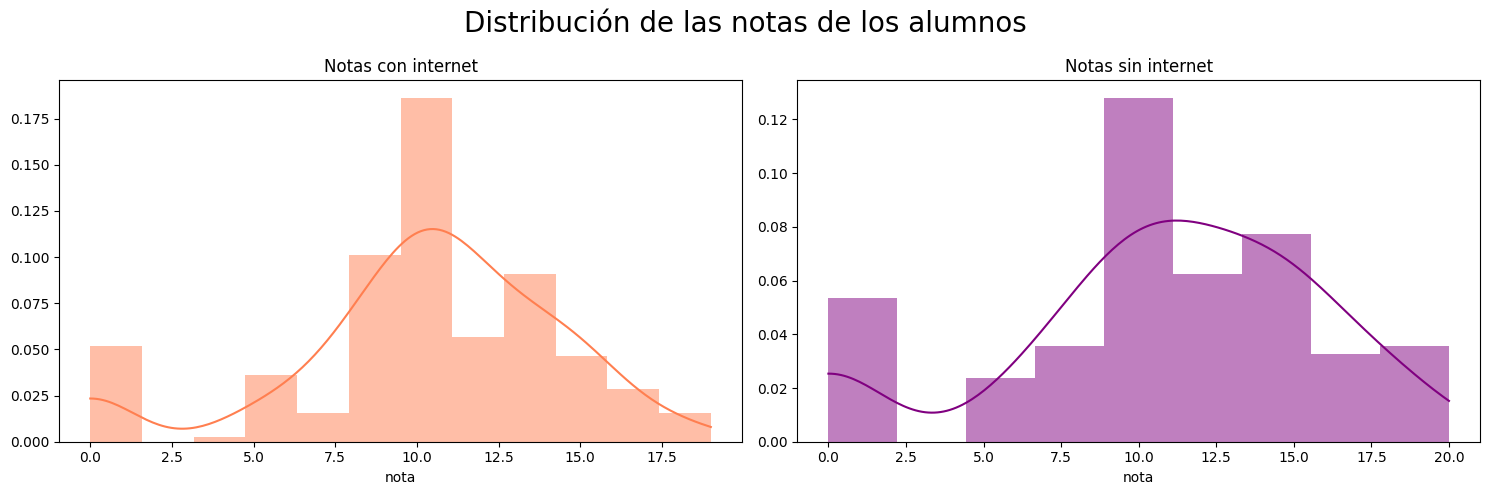

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=df[df.Walc >= 2], x="G3", 
             color='coral', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax1)
ax1.set_title('Notas con internet')
ax1.set_ylabel('')
ax1.set_xlabel('nota')

sns.histplot(data=df[df.Walc < 2], x="G3",
             color='purple', kde=True, stat="density", alpha=0.5, edgecolor=None, ax=ax2)
ax2.set_title('Notas sin internet')
ax2.set_ylabel('')
ax2.set_xlabel('nota')

plt.suptitle('Distribución de las notas de los alumnos', fontsize=20)
plt.tight_layout()
plt.show()

In [40]:
k2_stat, p_value = sm.stats.omni_normtest(G3_walc)

print("--- Nota con consumo ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}\n")

k2_stat, p_value = sm.stats.omni_normtest(G3_no_walc)

print("--- Nota sin consumo ---")
print(f"Estadístico K²: {k2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

--- Nota con consumo ---
Estadístico K²: 27.0351
p-valor: 0.0000

--- Nota sin consumo ---
Estadístico K²: 11.2251
p-valor: 0.0037


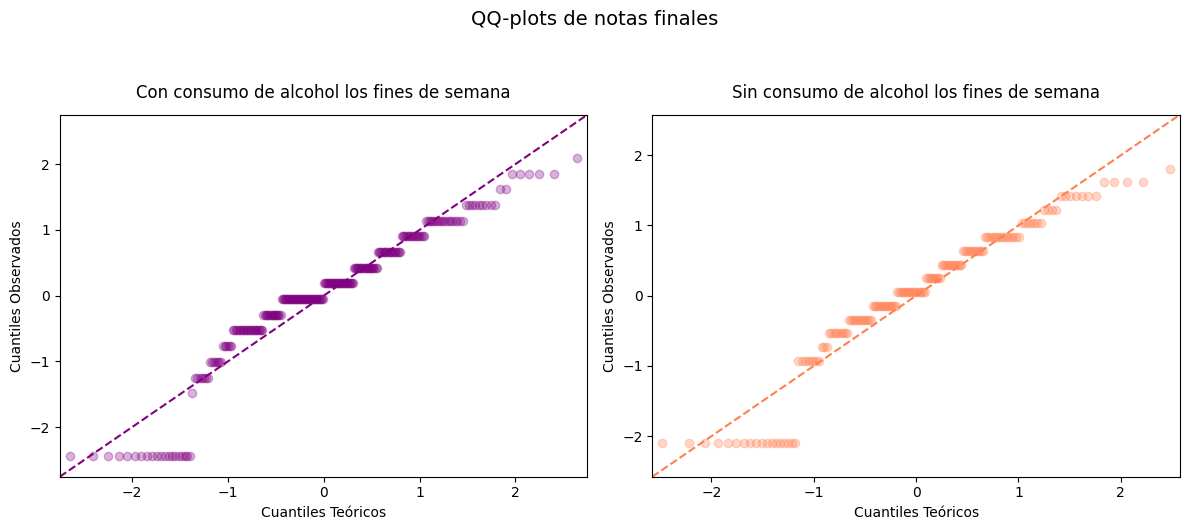

In [41]:
# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('QQ-plots de notas finales', fontsize=14, y=1.05)

pp1 = sm.ProbPlot(np.array(G3_walc), fit=True)

qq1 = pp1.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='purple',
          markeredgecolor='purple', # borde de los puntos
          ax=ax1)

sm.qqline(qq1.axes[0], line='45', color='purple', linestyle='--')

ax1.set_title('Con consumo de alcohol los fines de semana', pad=12)
ax1.set_xlabel('Cuantiles Teóricos')
ax1.set_ylabel('Cuantiles Observados')

pp2 = sm.ProbPlot(np.array(G3_no_walc), fit=True)

qq2 = pp2.qqplot(
          alpha=0.3, # Transparencia
          markerfacecolor='coral',
          markeredgecolor='coral', # borde de los puntos,
          ax=ax2)

sm.qqline(qq2.axes[1], line='45', color='coral', linestyle='--')

ax2.set_title('Sin consumo de alcohol los fines de semana', pad=12)
ax2.set_xlabel('Cuantiles Teóricos')
ax2.set_ylabel('Cuantiles Observados')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

Como la asimetría de las muestras es moderada y además son muestras grandes, utilizaremos un contraste paramétrico.

In [42]:
print(f"Asimetría notas con consumo: {stats.skew(G3_walc):.2f}\nAsimetría notas sin consumo: {stats.skew(G3_no_walc):.2f}")

Asimetría notas con consumo: -0.82
Asimetría notas sin consumo: -0.70


Como estamos trabajando con muestras independientes, utilizaremos un Z-test.

In [43]:
# Z-test para comparar las medias de dos poblaciones
z_stat, p_value = statsmodels.stats.weightstats.ztest(G3_walc, G3_no_walc, value=0, alternative="smaller")

print(f"Estadístico Z: {z_stat:.2f}")
print(f"P-valor: {p_value:.2f}")

Estadístico Z: -1.09
P-valor: 0.14


Como el p-valor es grande (mayor que nuestro nivel de significación $\alpha=0.05$), diremos que los datos no muestran evidencias suficientes como para rechazar la hipótesis nula de igualdad de medias. Por lo tanto, aceptaremos la hipótesis de que el consumo de alcohol no repercute en la nota media de los alumnos.

### Predicción de la nota

Nuestro modelo tendrá como variables exógenas todo los datos que recopila nuestro dataset (excepto las calificaciones).

In [44]:
X = df.drop(['G1', 'G2', 'G3'], axis=1)

La variable endógena (la cual es la que vamos a predecir) será la nota final del alumno. Como vamos a predecir si suspende o aprueba, realizamos una transformación tal que si el alumno aprueba la variable toma el valor 1 y si el alumno suspende toma el valor 0.

In [45]:
y = df.G3.map(lambda x: 1 if x>= 10 else 0)
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

En nuestro dataset tenemos muchas columnas no numéricas. Para construir un modelo de regresión lineal deberemos transformar las cadenas de texto a números, para ello utilizaremos un `LabelEncoder`.

In [46]:
from sklearn.preprocessing import LabelEncoder

# Selecciona las columnas no numéricas
columnas_no_numericas = X.select_dtypes(exclude=['int64', 'float64']).columns
columnas_no_numericas

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [47]:
# Aplica el LabelEncoder a cada columna no numérica
le = LabelEncoder()
for columna in columnas_no_numericas:
    X[columna] = le.fit_transform(X[columna])

Usar solo las variables con las que hemos trabajado.

In [61]:
X_filtered = X[['absences', 'paid', 'internet', 'Walc']]

Extraemos un conjunto de test del conjunto de entrenamiento para después de entrenarlo poder evaluarlo.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y.values.reshape(-1,1),
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

Añadimos $\beta_0$ a `X_train` para la construcción del modelo LOGIT.

In [72]:
X_train = sm.add_constant(X_train, prepend=True)

Creamos el modelo LOGIT de variable endogena `G3`.

In [73]:
modelo = sm.Logit(endog=y_train, exog=X_train,)

Entrenamos el modelo con nuestros datos de entrenamiento.

In [74]:
modelo = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.628410
         Iterations 5


In [75]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  316
Model:                          Logit   Df Residuals:                      311
Method:                           MLE   Df Model:                            4
Date:                Fri, 27 Jun 2025   Pseudo R-squ.:                 0.01498
Time:                        09:45:33   Log-Likelihood:                -198.58
converged:                       True   LL-Null:                       -201.60
Covariance Type:            nonrobust   LLR p-value:                    0.1962
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5346      0.367      1.455      0.146      -0.186       1.255
absences      -0.0211      0.014     -1.460      0.144      -0.049       0.007
paid           0.4043      0.246      1.645      0.100      -0.077       0.886
internet       0.2385      0.315      0.756      0.450      -0.380       0.857
Walc          -0.0461      0.095     -0.484      0.628      -0.233       0.141
==============================================================================
"""

##### Evaluación del modelo

Añadimos $\beta_0$ también a `X_test`.

In [84]:
X_test = sm.add_constant(X_test, prepend=True)
X_test

,const,absences,paid,internet,Walc
40,1.0,25,0,1,2
44,1.0,14,0,1,2
357,1.0,2,0,0,2
59,1.0,2,0,1,1
348,1.0,0,1,1,3
...,...,...,...,...,...
108,1.0,6,1,1,5
329,1.0,4,1,1,2
33,1.0,0,0,1,1
389,1.0,0,0,0,1


Calculamos las predicciones del conjunto de test. Como las predicciones son valores entre 0 y 1 (por la función sigmoide), las redondeamos para que sean o 0 o 1.

In [77]:
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones < 0.5, 0, 1)

Accuracy del modelo.

In [78]:
accuracy = accuracy_score(
    y_true = y_test,
    y_pred = clasificacion,
    normalize = True
)
print(f"El accuracy de test es: {100*accuracy:.2f}%")

El accuracy de test es: 69.62%


Matriz de confusión.

In [79]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,1
Real,
0,24
1,55


In [93]:
X_test

,const,absences,paid,internet,Walc
40,1.0,25,0,1,2
44,1.0,14,0,1,2
357,1.0,2,0,0,2
59,1.0,2,0,1,1
348,1.0,0,1,1,3
...,...,...,...,...,...
108,1.0,6,1,1,5
329,1.0,4,1,1,2
33,1.0,0,0,1,1
389,1.0,0,0,0,1


In [103]:
data = {
    'const' : [1.0],
    'absences': [5],
    'paid': [0],
    'internet': [1],
    'Walc': [5]
}
student = pd.DataFrame(data)
student

,const,absences,paid,internet,Walc
0,1.0,5,0,1,5


In [108]:
prob = modelo.predict(exog = student)[0]
print(f"probabilidad aprobar: {prob * 100:.2f}%")

probabilidad aprobar: 60.76%


In [109]:
data = {
    'const' : [1.0],
    'absences': [20],
    'paid': [0],
    'internet': [1],
    'Walc': [5]
}
student = pd.DataFrame(data)
student

,const,absences,paid,internet,Walc
0,1.0,20,0,1,5


In [110]:
prob = modelo.predict(exog = student)[0]
print(f"probabilidad aprobar: {prob * 100:.2f}%")

probabilidad aprobar: 53.03%


In [113]:
data = {
    'const' : [1.0],
    'absences': [5],
    'paid': [1],
    'internet': [1],
    'Walc': [5]
}
student = pd.DataFrame(data)
student

,const,absences,paid,internet,Walc
0,1.0,5,1,1,5


In [114]:
prob = modelo.predict(exog = student)[0]
print(f"probabilidad aprobar: {prob * 100:.2f}%")

probabilidad aprobar: 69.88%
